<h1>BREAST CANCER PREDICTION</h>

<h3>Importing dependencies</h>

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [2]:
column = ['id', 'cell_thickness', 'cell_size', 'cell_shape', 'adhesion', 'epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
         'normal_nucleoli', 'mitoses', 'class']

df = pd.read_csv('breast-cancer-wisconsin.data.csv', names = column)

<h3>Data Preprocessing</h>

In [3]:
df.head()

,id,cell_thickness,cell_size,cell_shape,adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.shape

(699, 11)

In [5]:
df.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    699 non-null    int64 
 1   cell_thickness        699 non-null    int64 
 2   cell_size             699 non-null    int64 
 3   cell_shape            699 non-null    int64 
 4   adhesion              699 non-null    int64 
 5   epithelial_cell_size  699 non-null    int64 
 6   bare_nuclei           699 non-null    object
 7   bland_chromatin       699 non-null    int64 
 8   normal_nucleoli       699 non-null    int64 
 9   mitoses               699 non-null    int64 
 10  class                 699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [6]:
df.describe()

,id,cell_thickness,cell_size,cell_shape,adhesion,epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


<h3>Handling Missing Data</h>

In [9]:
for i in column:
    for j in df[i]:
        if j=='?':
            print(i)
            break
            
#checking for null values

bare_nuclei


In [10]:
df[df['bare_nuclei']=='?']['bare_nuclei'].count()

16

In [11]:
df = df.replace('?', np.nan)
df = df.dropna()

In [12]:
df[df.isna()==True].count()

id                      0
cell_thickness          0
cell_size               0
cell_shape              0
adhesion                0
epithelial_cell_size    0
bare_nuclei             0
bland_chromatin         0
normal_nucleoli         0
mitoses                 0
class                   0
dtype: int64

<h3>Checking the distribution of classes</h>

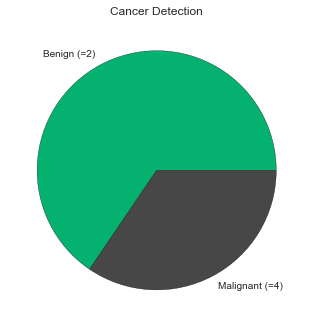

In [7]:
list = df['class'].value_counts()

plt.style.use('seaborn')
plt.pie(list, labels = ['Benign (=2)', 'Malignant (=4)'], wedgeprops={'edgecolor':'black'}, colors = ['#04B16F','#474747'])
plt.title('Cancer Detection')
plt.show()

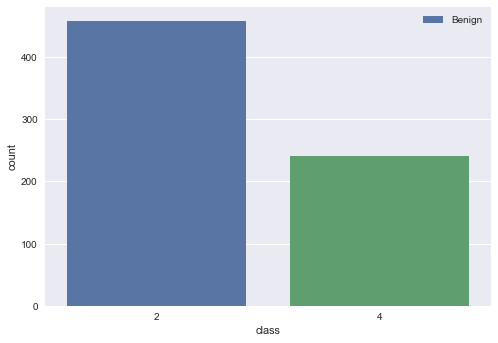

In [8]:
sns.countplot(x = 'class', data=df)
plt.legend(['Benign' ,'Malignant'])
plt.show()

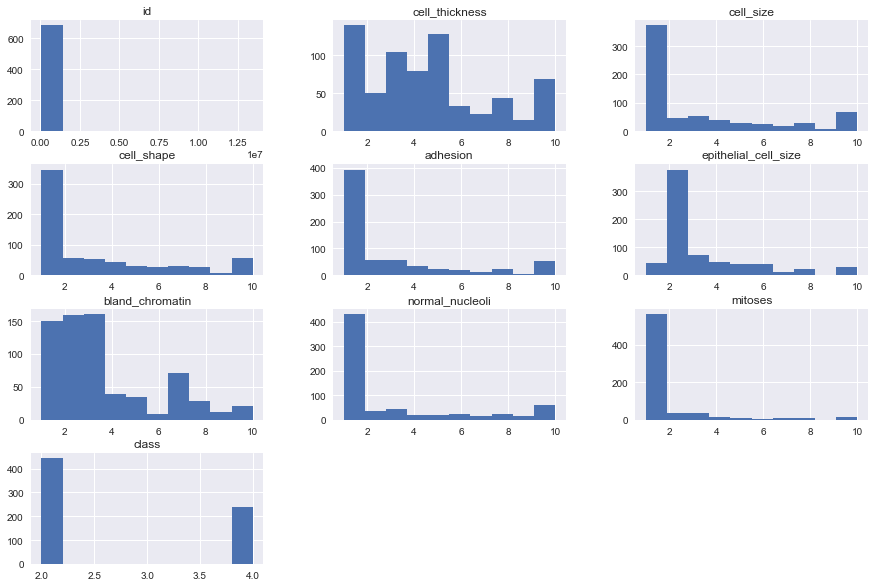

In [110]:
plt.style.use('seaborn')
hist = df.hist(bins=10, figsize=(15, 10))

<AxesSubplot:>

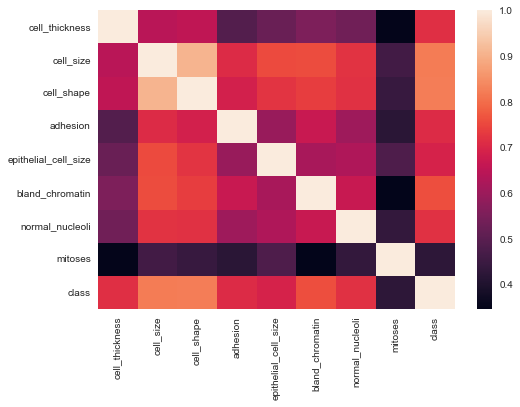

In [16]:
df_new = df.drop(['id'], axis=1)
sns.heatmap(df_new.corr())

<h3>Train-Test Split</h>

In [13]:
x = df.drop(['class'], axis=1)
y = df['class']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, random_state=50)

<h3>Accuracy of Models</h>

In [105]:
#ACCURACY
def accuracy(y_test, y_pred, model):
    acc_score = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label=2)
    precision = precision_score(y_test, y_pred, pos_label=2)
    print(f"Model: {model}")
    print(f"Accuracy: {acc_score*100}%")
    print("Recall Score: {}".format(recall))
    print("Precision score: {}".format(precision))
    return {"Accuracy Score": acc_score*100, "Recall Score":recall, "Precision Score": precision}


In [111]:
#Confusion Matrix
def cm(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(cm).plot()
   
# dictionary used to store the results of each model
dict = {}

<h3>Classification Models</h>

171   171
Model: Naive Bayes
Accuracy: 95.32163742690058%
Recall Score: 0.9454545454545454
Precision score: 0.9811320754716981


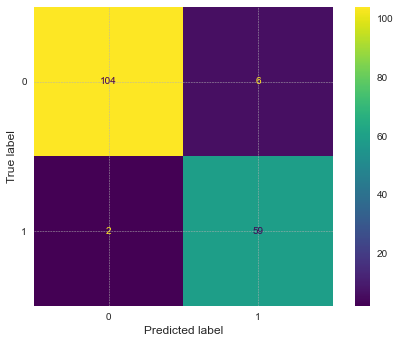

In [106]:
#NAIVE BAYES
model = GaussianNB()
nb = model.fit(X_train, y_train) 
y_pred_nb = nb.predict(X_test)
print(len(y_test), " ", len(y_pred_nb))
dict["Naive Bayes"] = accuracy(y_test, y_pred_nb, "Naive Bayes")
cm(y_test, y_pred_nb)

Model: Decision Tree
Accuracy: 93.56725146198829%
Recall Score: 0.9272727272727272
Precision score: 0.9714285714285714


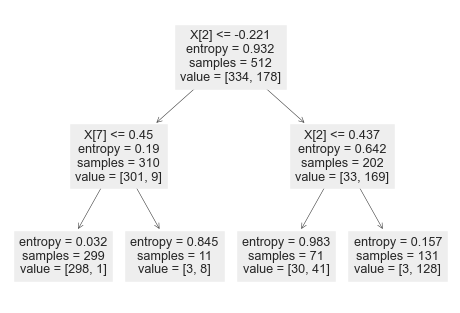

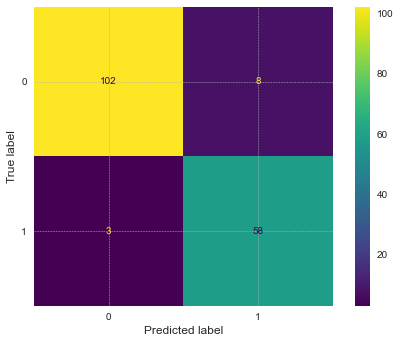

In [107]:
#DECISION TREE
model = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=2, random_state=0)
clf = model.fit(X_train, y_train)
tree.plot_tree(clf)
y_pred_dt = clf.predict(X_test)

dict["Decision Tree"] = accuracy(y_test, y_pred_dt, "Decision Tree")
cm(y_test, y_pred_dt)

Model: K-Nearest Neighbours
Accuracy: 98.24561403508771%
Recall Score: 0.990909090909091
Precision score: 0.9819819819819819


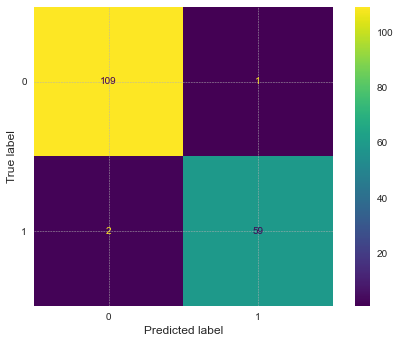

In [108]:
#KNN
#STANDARD SCALER
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

dict["K-Nearest Neighbour"] = accuracy(y_test, y_pred_knn, "K-Nearest Neighbours")
cm(y_test, y_pred_knn)

In [109]:
for i in dict.keys():
    print(f"{i}:")
    for j in dict[i].keys():
        print(f"{j}: {dict[i][j]}")
    print("\n")

Naive Bayes:
Accuracy Score: 95.32163742690058
Recall Score: 0.9454545454545454
Precision Score: 0.9811320754716981


Decision Tree:
Accuracy Score: 93.56725146198829
Recall Score: 0.9272727272727272
Precision Score: 0.9714285714285714


K-Nearest Neighbour:
Accuracy Score: 98.24561403508771
Recall Score: 0.990909090909091
Precision Score: 0.9819819819819819




<h1>Conclusion</h>

Thus, the best accuracy and recall score is provided by K-NN (K-Nearest Neighbours) model which is 98.24% and 0.9909 respectively. The recall score is especially important in Breast Cancer Prediction as we want to reduce False Negatives, so as to predict all the cancer positive cases as accurately as possible. In these situations, we can compromise with the low precision, but recall should be high.

So, K-NN is the best model for Breast Cancer Prediction.